In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets, metrics, model_selection, svm
from scipy import stats 


In [2]:
df = pd.read_csv('train.csv')
dff = pd.DataFrame(df)



In [3]:
df = df.assign(SalesLog=np.log(df['SalePrice']))

In [4]:
x = df['GrLivArea']
y = df['SalesLog']

x = x.to_numpy()
y = y.to_numpy()


xn = x.reshape(-1,1)
yn = y.reshape(-1,1)

In [5]:
X_train = xn[:1200]
X_test = xn[1200:]

# Split the targets into training/testing sets
Y_train = yn[:1200]
Y_test = yn[1200:]

Y_train


array([[12.24769432],
       [12.10901093],
       [12.31716669],
       ...,
       [11.87756858],
       [12.08953883],
       [11.90496755]])

In [6]:
reg = linear_model.LinearRegression()

Coefficients: 
 [[0.00056797]]
Mean squared error: 0.10
Coefficient of determination: 0.27


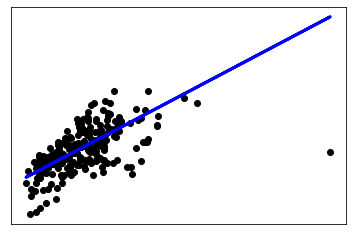

In [7]:
reg.fit(X_train, Y_train)

# Make predictions using the testing set
pric_y_pred = reg.predict(X_test)

 # The coefficients
print("Coefficients: \n", reg.coef_)
 # The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, pric_y_pred))
 # The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, pric_y_pred))

 # Plot outputs
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, pric_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
reg.score(X_test, Y_test)

0.2746758113030807

In [9]:
Y_pred =reg.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

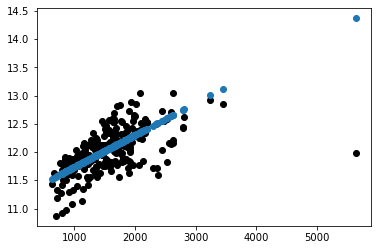

In [10]:
plt.scatter(X_test, Y_test, color="black")
plt.scatter(X_test, Y_pred)
plt.show

In [11]:
resid = (Y_test - Y_pred)
rss = np.sum(np.square(Y_test - Y_pred))
resid
rss

27.221364393266565

<function matplotlib.pyplot.show(close=None, block=None)>

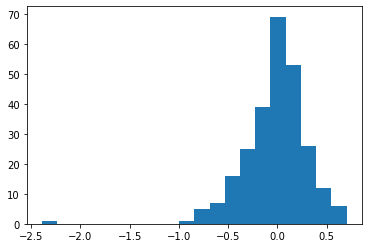

In [12]:
plt.hist(resid, bins = 20)
plt.show

In [13]:
print(np.mean(resid))
print(np.std(resid))


-0.02523601489423413
0.3225844058707357


In [14]:
rss


27.221364393266565

In [15]:
mean_squared_error(Y_test, Y_pred, squared = False)


0.32357001616144465

In [16]:
r2_score(Y_test, Y_pred)

0.2746758113030807

In [17]:
numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n')

SalePrice       1.000000
SalesLog        0.948374
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64 



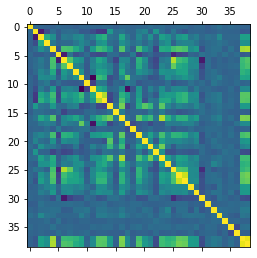

In [18]:
corrM = df.corr()
plt.matshow(corrM)
plt.show()

In [19]:
reg2 = linear_model.LinearRegression()




In [20]:
x2 = df[['GrLivArea','OverallQual']]
y2 = df['SalesLog']

In [21]:
X_train, X_test, y_train, y_test = train_test_split( x2, y2, test_size=0.33, random_state=42)

In [22]:
y_test

892     11.947949
1105    12.691580
413     11.652687
522     11.976659
1036    12.661914
          ...    
1010    11.813030
390     11.686879
1409    12.278393
847     11.801857
1284    12.037654
Name: SalesLog, Length: 482, dtype: float64

Coefficients: 
 [0.00023339 0.18037554]
Mean squared error: 0.04
Coefficient of determination: 0.78


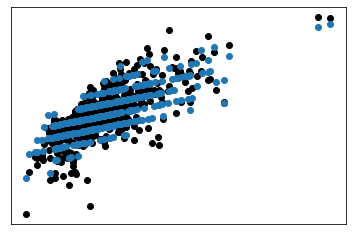

In [23]:
reg2.fit(X_train, y_train)

# Make predictions using the testing set
price_y_pred = reg2.predict(X_test)

 # The coefficients
print("Coefficients: \n", reg2.coef_)
 # The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, price_y_pred))
 # The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, price_y_pred))

 # Plot outputs
plt.scatter(X_test['GrLivArea'], y_test, color="black")
plt.scatter(X_test['GrLivArea'], price_y_pred)


plt.xticks(())
plt.yticks(())

plt.show()

In [24]:
resid = (y_test - price_y_pred)
rss = np.sum(np.square(y_test - price_y_pred))

rss


18.43946807074022

In [25]:
r2_score(y_test, price_y_pred)

0.7755333725571261

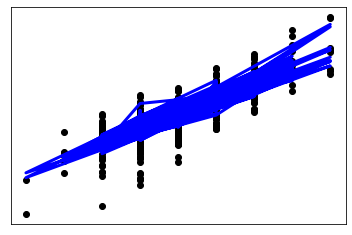

In [26]:
plt.scatter(X_test['OverallQual'], y_test, color="black")
plt.plot(X_test['OverallQual'], price_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

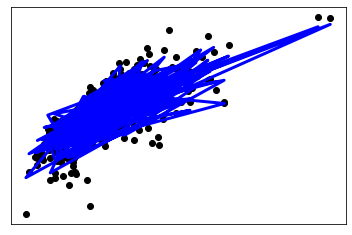

In [27]:
plt.scatter(X_test['GrLivArea'], y_test, color="black")
plt.plot(X_test['GrLivArea'], price_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [3]:
crime = pd.read_csv("censusCrimeClean.csv")

crime


,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [ ]:
crime.describe()

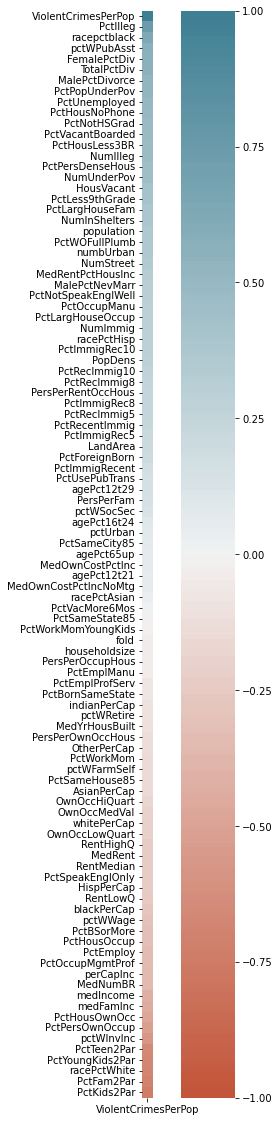

In [8]:


corr_crimes=corr[['ViolentCrimesPerPop']]

#sort by the amount of correlation
corr_crimes=corr_crimes.sort_values(by ='ViolentCrimesPerPop',ascending=False)

plt.figure(figsize = (10,20))
import seaborn as sns
ax = sns.heatmap(
    corr_crimes, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [6]:
numeric_features = crime.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['ViolentCrimesPerPop'].sort_values(ascending=False)[:10], '\n')

ViolentCrimesPerPop    1.000000
PctIlleg               0.737957
racepctblack           0.631264
pctWPubAsst            0.574665
FemalePctDiv           0.556032
TotalPctDiv            0.552777
MalePctDivorce         0.525407
PctPopUnderPov         0.521877
PctUnemployed          0.504235
PctHousNoPhone         0.488243
Name: ViolentCrimesPerPop, dtype: float64 



In [18]:
Cx = crime['PctIlleg']
Cy = crime['ViolentCrimesPerPop']

In [10]:
Cx

,PctIlleg,racepctblack,pctWPubAsst,FemalePctDiv
0,0.14,0.02,0.15,0.75
1,0.24,0.12,0.29,0.91
2,0.46,0.49,0.40,0.71
3,0.33,1.00,0.20,0.49
4,0.06,0.02,0.11,0.20
...,...,...,...,...
1989,0.11,0.10,0.06,0.59
1990,0.42,0.46,0.37,0.56
1991,0.54,0.25,0.48,0.50
1992,0.17,0.06,0.24,0.30


In [12]:
X_train, X_test, y_train, y_test = train_test_split( Cx, Cy, test_size=0.33, random_state=42)

In [33]:
slope, intercept, r, p, se  = stats.linregress(Cx, Cy)

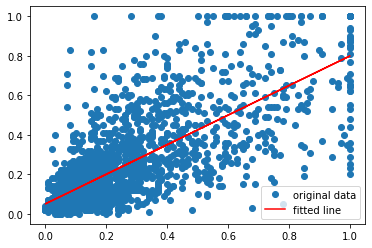

In [42]:
plt.plot(Cx, Cy, 'o', label='original data')

plt.plot(Cx, reg3.intercept + reg3.slope*Cx, 'r', label='fitted line')


plt.legend()

plt.show()

In [36]:
modelledDependent = np.polyval([slope, intercept], Cx)

In [37]:
modelledDependent

array([0.15573472, 0.2305056 , 0.39500154, ..., 0.45481824, 0.17816598,
       0.37257027])

In [39]:
pCoeff = np.polyfit(Cx, Cy, 2)
evaluatedCurve = np.polyval(pCoeff, Cx)

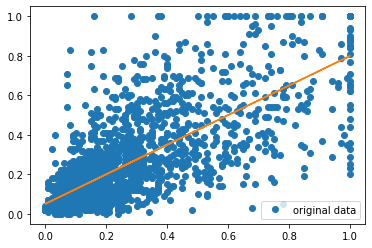

In [41]:
plt.plot(Cx, Cy, 'o', label='original data')

plt.plot(Cx, modelledDependent)

plt.legend()

plt.show()